https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

MALLET INSTALLATION: http://shiningmeadow.blogspot.com/2016/04/tutorial-for-installing-mallet-on.html

MALLET ISSUE FIX: https://github.com/RaRe-Technologies/gensim/issues/2163

In [39]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lokeshwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
# pip install pyLDAvis

In [42]:
# pip install gensim

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import nltk

ImportError: DLL load failed: The specified module could not be found.

In [25]:
# nltk.download('stopwords') 

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu'])
stop_words.extend(['reply','email','check','mail','service','qs','view','asu','http','please','aspx','https','pm','click'])
# stop_words.extend(['covid', 'coronavirus', 'covid19', 'covid-19', 'make', 'give', 'amp', 'corona', 'back', 'day', 
#                    'month', 'week', 'year', 'put', 'today', 'thing', 'hour', 'read', 'share', 'find', 'free', 
#                    'part', 'show', 'play', 'shit','fuck', 'post', 'join', 'man', 'woman', 'men', 'women', 
#                   'theya','lot','time', 'china','chinese','virus'])
# stop_words.extend(['covid', 'coronavirus', 'covid19', 'covid-19', 'make', 'give', 'amp', 'corona', 'back', 'day', 
#                    'month', 'week', 'year', 'put', 'today', 'thing', 'hour', 'read', 'share', 'find', 'free', 
#                    'part', 'show', 'play', 'shit', 'post', 'join', 'man', 'woman', 'men', 'women', 
#                   'theya','lot','time','include','show','bring','due','watch','provide','talk','call','hear','run',
#                   'set','feel'])
# stop_words.extend(['vaccine','vaccines','vacc','vaccination','could','say','s','would','see','likely','really','tell','early','basically','will','be','stop','let',
# 'sell',
# 'go',
# 'may',
# 'unlikely',
# 'find',
# 'come',
# 'listen',
# 'long',
# 'must',
# 'maybe',
# 'never',
# 'many',
# 's',
# 'get',
# 'way',
# 'ou',
# 'make',
# 'can',
# 'also',
# 'have',
# 'give',
# 'clearly',
# 'use',
# 'even',
# 'take',
# 'yet',
# 'still'])
stop_words.extend(['wanted', 'inquired', 'student', 'please', 'like',
                   'thank', 'asu', 'would', 'also', 'know', 'hello', 'could',
                   'get', 'inquiring', 'wanting', 'per', 'std', 'made', 'need', 'explained',
                   'informed', 'advised', 'needed', 'yes', 'no', 'must', 'case', 'ok',
                    'error_present', 'okay', 'hi', 'need'])
# stop_words.extend(['covid', 'coronavirus', 'covid19', 'covid-19', 'make', 'give', 'amp', 'corona', 'back', 'day', 
#                    'month', 'week', 'year', 'put', 'today', 'thing', 'hour', 'read', 'share', 'find', 'free', 
#                    'part', 'show', 'play', 'shit', 'post', 'join', 'man', 'woman', 'men', 'women', 
#                   'theya','lot','time','include','show','bring','due','watch','provide','talk','call','hear','run',
#                   'set','feel','workfromhome','transportation','publictransportation','zoom','meeting','wfh',
#                   'stayathome','stayhome','online','lockdown','work','home','stay','sit','remote','reomtework'])


In [26]:
# Import Dataset
# df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
# print(df.target_names.unique())
# df.head()

# df = pd.read_csv('/Users/fwei15/Dropbox (ASU)/DT Projects/COVID-19/Test/adidas_reviews_march_14.csv')
#df = pd.read_csv('sfe_cases_2020-07-01_2020-09-03.csv')
                # engine = 'python',
                # encoding = "ISO-8859-1")

df=pd.read_csv('sfe_cases_emails_20190601_20210301.csv',encoding='ISO-8859-1')
df.head()


,fin_group,case_id,case_number,contact_id,contact_emplid,contact_asurite,origin,inbound_interaction,original_func_group,functional_group,...,closed_on_create,owner_id,owner_emplid,owner_asurite,created_by_id,creator_emplid,creator_asurite,created_by_name,created_by_role,created_date
0,Email: EC,5000W00001fJSYFQA4,12683772,003d000003GpTIpAAN,1.213541e+09,ndiazmel,Email,False,Help Desk,Help Desk,...,False,0050W000007SH8hQAG,1.220616e+09,jhodge9,0050W0000074rzGQAQ,1214650411,cebrey,Corionna Brey,HD Help Desk Staff,2020-08-07 20:36:26
1,Email: FASS,5000W00001S66oxQAB,9296286,003d000002Dk9vWAAR,1.209993e+09,acranfor,Email,False,Help Desk,Financial Aid,...,False,005d0000006GvrAAAS,1.210520e+09,damuli,005d0000006AiX5AAK,1000224933,cdelrae,Christopher Del Rae,UTO University Technology Office,2019-07-09 16:46:00
2,Email: FASS,5000W00001j3tWNQAY,14143772,0030W00003lv3V1QAI,NaN,NaN,Email,False,Help Desk,Financial Aid,...,False,0050W000007Ou3kQAC,1.216071e+09,hrimmer,0050W000006M9QWQA0,1216798908,tjones81,Tamisha Jones,HD Help Desk Staff,2021-01-18 19:21:26
3,Email: EC,5000W00001WI930QAD,10040557,0030W00003ax4ApQAI,1.217353e+09,cpaez1,Email,False,Help Desk,Help Desk,...,False,0050W000006M9QWQA0,1.216799e+09,tjones81,0050W000006M9QWQA0,1216798908,tjones81,Tamisha Jones,HD Help Desk Staff,2019-10-12 05:22:03
4,Email: EC,5000W00001UZqm8QAD,9654215,0030W00003f7v0wQAA,1.218096e+09,mzgreen,Email,False,Help Desk,Help Desk,...,False,0050W000006M9QWQA0,1.216799e+09,tjones81,0050W000006M9QWQA0,1216798908,tjones81,Tamisha Jones,HD Help Desk Staff,2019-08-22 10:14:05


In [27]:
tempdf=df.copy(deep=True)

In [28]:
df=df[df['fin_group'].isin(['Email: SBS','Email: FASS','Email: EC'])]

In [29]:
df.columns

Index(['fin_group', 'case_id', 'case_number', 'contact_id', 'contact_emplid',
       'contact_asurite', 'origin', 'inbound_interaction',
       'original_func_group', 'functional_group', 'case_classification_name',
       'category', 'sub_category', 'subject', 'description', 'priority',
       'status', 'closed', 'closed_date', 'closed_on_create', 'owner_id',
       'owner_emplid', 'owner_asurite', 'created_by_id', 'creator_emplid',
       'creator_asurite', 'created_by_name', 'created_by_role',
       'created_date'],
      dtype='object')

In [17]:
df['functional_group'].unique()

array(['Help Desk', 'Financial Aid', 'Student Business Services'],
      dtype=object)

In [30]:
df_sbs= df[df['functional_group'] == 'Student Business Services']  #Student Business Services
df_fa=  df[df['functional_group'] == 'Financial Aid'] #Financial Aid
df_hd=  df[df['functional_group'] == 'Help Desk'] #Help Desk

In [93]:
data = df_hd['description'].values.tolist()

In [94]:
# Convert to list


# # Remove Emails
data = [re.sub('\S*@\S*\s?', '', str(sent)) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', str(sent)) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", str(sent)) for sent in data]

data= [sent.lower() for sent in data ]



In [95]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['ferpa', 'verified', 'aid', 'year', 'description', 'of', 'issue', 'steps', 'taken', 'sent', 'email', 'to', 'follow', 'up', 'on', 'case', 'resource', 'used', 'myasu', 'ps', 'sf', 'reason', 'for', 'escalation']]


In [96]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=1, threshold=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words])  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print("trigram: ", trigram_mod[bigram_mod[data_words[0]]])
print("bigram: ", bigram_mod[data_words[0]])


trigram:  ['ferpa_verified_aid_year', 'description_of_issue', 'steps_taken', 'sent', 'email', 'to', 'follow_up', 'on', 'case', 'resource_used', 'myasu', 'ps_sf', 'reason_for_escalation']
bigram:  ['ferpa_verified', 'aid_year', 'description_of', 'issue', 'steps_taken', 'sent', 'email', 'to', 'follow_up', 'on', 'case', 'resource_used', 'myasu', 'ps_sf', 'reason_for', 'escalation']


In [97]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:5])

[['description', 'issue', 'send', 'follow', 'resource_used', 'myasu', 'reason', 'escalation'], ['reply'], ['response'], ['relate'], ['response']]


In [98]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]


In [99]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('description', 1),
  ('escalation', 1),
  ('follow', 1),
  ('issue', 1),
  ('myasu', 1),
  ('reason', 1),
  ('resource_used', 1),
  ('send', 1)]]

#Building the Topic Model
#LDA MODEL

In [100]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
      model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=25,
                                           alpha='auto',
                                           per_word_topics=True)
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

# 

Coherence Score - Is defined as the average / median of the pairwise word-similarity scores of the words in the topic - Higher the better.

In [101]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=10, step=1)

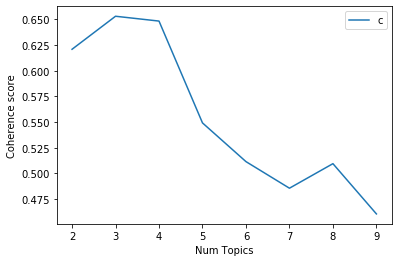

In [102]:
# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [103]:

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.621
Num Topics = 3  has Coherence Value of 0.6531
Num Topics = 4  has Coherence Value of 0.6484
Num Topics = 5  has Coherence Value of 0.5492
Num Topics = 6  has Coherence Value of 0.5115
Num Topics = 7  has Coherence Value of 0.4856
Num Topics = 8  has Coherence Value of 0.5095
Num Topics = 9  has Coherence Value of 0.4606


In [104]:
num_topics=4 #  Number of topics will be the value with the highest Coherence score

In [105]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=25,
                                           alpha='auto',
                                           per_word_topics=True)

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


Perplexity:  -6.644287954949783

Coherence Score:  0.6484398015462383
[(0,
  '0.031*"pay" + 0.024*"account" + 0.024*"tuition" + 0.019*"charge" + '
  '0.017*"fee" + 0.016*"payment" + 0.013*"receive" + 0.013*"class" + '
  '0.012*"due" + 0.011*"loan"'),
 (1,
  '0.064*"click" + 0.035*"financial_aid" + 0.020*"scholarship_service" + '
  '0.016*"fafsa" + 0.016*"award" + 0.013*"enrollment" + 0.013*"scholarship" + '
  '0.012*"question" + 0.011*"complete" + 0.011*"provide"'),
 (2,
  '0.111*"click" + 0.049*"business_service" + 0.040*"due" + 0.039*"page" + '
  '0.037*"top" + 0.026*"unpaid" + 0.024*"send" + 0.023*"charge" + 0.022*"pay" '
  '+ 0.021*"go"'),
 (3,
  '0.023*"address" + 0.019*"receive" + 0.019*"information" + 0.018*"send" + '
  '0.017*"refund" + 0.016*"account" + 0.012*"student" + 0.011*"contact" + '
  '0.011*"complete" + 0.011*"form"')]


In [106]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
print('\nCoherence Score: ', coherence_lda)
for topic in lda_model.print_topics():
    topicsx=[t.split('*')[1].replace('"','').strip() for t in topic[1].split('+')]
    print(f'Topic {topic[0]} : {topicsx}')


Perplexity:  -6.644271475506023

Coherence Score:  0.6484398015462383
Topic 0 : ['pay', 'account', 'tuition', 'charge', 'fee', 'payment', 'receive', 'class', 'due', 'loan']
Topic 1 : ['click', 'financial_aid', 'scholarship_service', 'fafsa', 'award', 'enrollment', 'scholarship', 'question', 'complete', 'provide']
Topic 2 : ['click', 'business_service', 'due', 'page', 'top', 'unpaid', 'send', 'charge', 'pay', 'go']
Topic 3 : ['address', 'receive', 'information', 'send', 'refund', 'account', 'student', 'contact', 'complete', 'form']


In [23]:
import os
import pickle
pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_data_filepath = (r'C:\Users\Lokeshwar\Documents\MS\Partime\Tweet Analysis\Opinion Mining\0105\vaccine_negative_tweets_topic_model')

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#pyLDAvis.save_html(LDAvis_prepared, '/content/drive/My Drive/Opinion Mining/vaccine_negative_tweets_topic_model.html')

LDAvis_prepared

# Larger topics are more frequent in the corpus. Topics closer together are more similar, topics further apart are less similar. When you select a topic, you can see the most representative words for the selected topic. This measure can be a combination of how frequent or how discriminant the word is. You can adjust the weight of each property using the slider. Hovering over a word will adjust the topic sizes according to how representative the word is for the topic.

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.195549  0.065679       1        1  39.078758
2     -0.179843  0.092548       2        1  37.493881
1      0.050147 -0.294259       3        1  22.580416
3      0.325246  0.136032       4        1   0.846943, topic_info=       Category          Freq                   Term         Total  loglift  \
487     Default  80437.000000              dangerous  80437.000000  30.0000   
93      Default  77096.000000           black_people  77096.000000  29.0000   
624     Default  76521.000000                 matter  76521.000000  28.0000   
465     Default  82020.000000                    can  82020.000000  27.0000   
793     Default  75714.000000                   none  75714.000000  26.0000   
...         ...           ...                    ...           ...      ...   
11438    Topic4      3.229908                tripura    354.035736   0.0743   
153668   Topic4      3.087699     breaking_professor    465.468903  -0.2443   
154670   Topic4      2.744862                clearer    268.644653   0.1876   
81       Topic4      2.815449  significantly_expande    416.748322  -0.2261   
141932   Topic4      3.063551    company_investigate   3980.850586  -2.3984   

        logprob  
487     30.0000  
93      29.0000  
624     28.0000  
465     27.0000  
793     26.0000  
...         ...  
11438   -9.0514  
153668  -9.0964  
154670  -9.2141  
81      -9.1887  
141932  -9.1042  

[919 rows x 6 columns], token_table=        Topic      Freq           Term
term                                  
162079      1  0.372993  aborted_fetus
162079      2  0.372993  aborted_fetus
162079      3  0.372993  aborted_fetus
162079      4  0.186496  aborted_fetus
346         3  0.999470            act
...       ...       ...            ...
237         3  0.012174          world
162074      1  0.373170    youreminder
162074      2  0.373170    youreminder
162074      3  0.373170    youreminder
162074      4  0.186585    youreminder

[598 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

In [61]:
# Select the model and print the topics
# optimal_model = model_list[5] #12 topics
# model_topics = optimal_model.show_topics(formatted=False)
# pprint(optimal_model.print_topics(num_words=10))

In [59]:
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import os

# os.environ.update({'MALLET_HOME':r'C:\Users\Lokeshwar\Documents\MS\Partime\Tweet Analysis\Opinion Mining\mallet-2.0.8\mallet-2.0.8'})

# mallet_path = 'C:/Users/Lokeshwar/Documents/MS/Partime/Tweet Analysis/Opinion Mining/mallet-2.0.8/mallet-2.0.8/bin/mallet' # update this path

os.environ.update({'MALLET_HOME':r'C:/new_mallet/mallet-2.0.8/'})
mallet_path = 'C:/new_mallet/mallet-2.0.8/bin/mallet' # update this path



In [25]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=7, id2word=id2word)
# Show Topics
pprint(ldamallet.show_topics(formatted=False))



[(0,
  [('develop', 0.03185800190061943),
   ('ready', 0.025953836775655034),
   ('cure', 0.025056765699409317),
   ('world', 0.024207609398749424),
   ('election', 0.023624646295788556),
   ('push', 0.020438313719331216),
   ('million', 0.017976026640615227),
   ('state', 0.017070969768438537),
   ('claim', 0.013330955340767222),
   ('make', 0.013086057598884118)]),
 (1,
  [('people', 0.05625514544910671),
   ('flu', 0.03750784226005331),
   ('treatment', 0.02610380637493018),
   ('die', 0.02074062701019957),
   ('bill_gate', 0.020142365146216788),
   ('raise', 0.01880554106961809),
   ('gate', 0.016348961380343658),
   ('plan', 0.016047183271962962),
   ('kill', 0.015859233748322352),
   ('receive', 0.013900323220237133)]),
 (2,
  [('trial', 0.06607236772904176),
   ('develop', 0.026995897759545598),
   ('test', 0.026927527085305564),
   ('candidate', 0.02223361733459556),
   ('result', 0.01687966761333754),
   ('potential', 0.016577258861891236),
   ('start', 0.015320290312401388),


In [34]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

NameError: name 'ldamallet' is not defined

In [107]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=1500)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [108]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=3, limit=10, step=1)

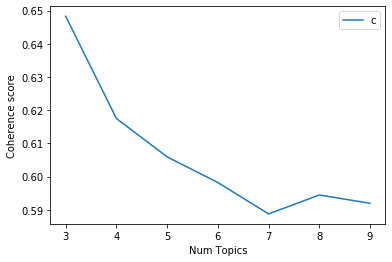

In [109]:
# Show graph
limit=10; start=3; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [110]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 3  has Coherence Value of 0.6483
Num Topics = 4  has Coherence Value of 0.6175
Num Topics = 5  has Coherence Value of 0.6059
Num Topics = 6  has Coherence Value of 0.5982
Num Topics = 7  has Coherence Value of 0.5888
Num Topics = 8  has Coherence Value of 0.5945
Num Topics = 9  has Coherence Value of 0.592


In [116]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.018*"time" + 0.016*"receive" + 0.012*"issue" + 0.012*"refund" + '
  '0.011*"school" + 0.009*"program" + 0.009*"send" + 0.008*"contact" + '
  '0.008*"office" + 0.008*"regard"'),
 (1,
  '0.079*"account" + 0.079*"pay" + 0.055*"tuition" + 0.041*"charge" + '
  '0.037*"fee" + 0.037*"payment" + 0.031*"class" + 0.020*"balance" + '
  '0.020*"amount" + 0.015*"fall"'),
 (2,
  '0.032*"financial_aid" + 0.031*"receive" + 0.027*"address" + '
  '0.022*"scholarship" + 0.019*"information" + 0.019*"loan" + 0.017*"complete" '
  '+ 0.016*"award" + 0.015*"apply" + 0.015*"question"'),
 (3,
  '0.149*"click" + 0.061*"due" + 0.050*"business_service" + 0.044*"page" + '
  '0.044*"send" + 0.039*"top" + 0.025*"call" + 0.024*"charge" + 0.023*"unpaid" '
  '+ 0.023*"write"')]


In [117]:
for topic in optimal_model.print_topics():
    topicsx=[t.split('*')[1].replace('"','').strip() for t in topic[1].split('+')]
    print(f'Topic {topic[0]} : {topicsx}')

Topic 0 : ['time', 'receive', 'issue', 'refund', 'school', 'program', 'send', 'contact', 'office', 'regard']
Topic 1 : ['account', 'pay', 'tuition', 'charge', 'fee', 'payment', 'class', 'balance', 'amount', 'fall']
Topic 2 : ['financial_aid', 'receive', 'address', 'scholarship', 'information', 'loan', 'complete', 'award', 'apply', 'question']
Topic 3 : ['click', 'due', 'business_service', 'page', 'send', 'top', 'call', 'charge', 'unpaid', 'write']


In [118]:
def format_topics_sentences(ldamodel, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.3094,"time, receive, issue, refund, school, program,...",ferpa verified: y aid year: 2020/2021 descript...
1,1,0.0,0.2647,"time, receive, issue, refund, school, program,...",replying to case # 10028081
2,2,0.0,0.2647,"time, receive, issue, refund, school, program,...",response to case # 09581810
3,3,2.0,0.2647,"financial_aid, receive, address, scholarship, ...",related to case # 11921796
4,4,0.0,0.2647,"time, receive, issue, refund, school, program,...",response to case # 09570573
5,5,0.0,0.2647,"time, receive, issue, refund, school, program,...",response to case # 09570002
6,6,0.0,0.2500,"time, receive, issue, refund, school, program,...",reply to case # 10234991
7,7,0.0,0.2768,"time, receive, issue, refund, school, program,...",student emailed her academic advisor with ques...
8,8,0.0,0.2726,"time, receive, issue, refund, school, program,...",received case # 09643974 in regards to student...
9,9,0.0,0.2647,"time, receive, issue, refund, school, program,...",response to case 12948058 and 13067688


In [119]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(15)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6526,"time, receive, issue, refund, school, program,...","dear student business services, checking the p..."
1,1.0,0.5657,"account, pay, tuition, charge, fee, payment, c...","hello, i¿m currently waiting on a scholarship ..."
2,2.0,0.7947,"financial_aid, receive, address, scholarship, ...",this is for trevor pacheco 1217471866 can you ...
3,3.0,0.6524,"click, due, business_service, page, send, top,...","good morning, i received this email yesterday ..."


In [120]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(10)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,0.0,"time, receive, issue, refund, school, program,...",4660.0,0.3311
1.0,0.0,"time, receive, issue, refund, school, program,...",4782.0,0.3397
2.0,0.0,"time, receive, issue, refund, school, program,...",2365.0,0.1680
3.0,2.0,"financial_aid, receive, address, scholarship, ...",2269.0,0.1612
4.0,0.0,"time, receive, issue, refund, school, program,...",NaN,NaN
5.0,0.0,"time, receive, issue, refund, school, program,...",NaN,NaN
6.0,0.0,"time, receive, issue, refund, school, program,...",NaN,NaN
7.0,0.0,"time, receive, issue, refund, school, program,...",NaN,NaN
8.0,0.0,"time, receive, issue, refund, school, program,...",NaN,NaN
9.0,0.0,"time, receive, issue, refund, school, program,...",NaN,NaN


In [121]:
df_dominant_topic.to_csv('hd_dominant_topic_wd.csv',index=False)
sent_topics_sorteddf_mallet.to_csv('hd_sent_topics_sorteddf_mallet_wd.csv',index=False)
df_dominant_topics.to_csv('hd_dominant_topics_wd.csv',index=False)